In [1]:
from google.colab import drive
drive.mount('/content/drive')
import torch
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cuda


In [2]:
import warnings
warnings.filterwarnings(action='ignore')
!unzip -qq "/content/drive/MyDrive/Dataset/open.zip"

In [3]:
!pip install -U openmim
!mim install mmcv
!mim install mmdet
!mim install mmengine

!git clone https://github.com/open-mmlab/mmdetection.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.3/297.3 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 25.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.1/953.1 kB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 580.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.1.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.3/99.3 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.1/450.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 21.6 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.1.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.4 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.1.0/index.html
Cloning into 'mmdetection'...
remote: Enumerating objects: 37627, done.
remote: Counting objects: 100% (228/228), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 37627 (delta 81), reused 158 (delta 64), pack-reused 37399
Receiving objects: 100% (37627/37627), 63.00 MiB | 16.26 MiB/s, done.
Resolving deltas: 100% (25920/25920), done.


In [4]:
import mmdet
print(mmdet.__version__)

3.2.0


In [5]:
%cd mmdetection
!python setup.py install
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v3.0/detr/detr_r50_8xb2-150e_coco/detr_r50_8xb2-150e_coco_20221023_153551-436d03e8.pth -O checkpoints/detr_r50_8xb2-150e_coco_20221023_153551-436d03e8.pth


/content/mmdetection
running install
/usr/local/lib/python3.10/dist-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/setuptools/command/easy_install.py:156: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
running bdist_egg
running egg_info
creating mmdet.egg-info
writing manifest file 'mmdet.egg-info/SOURCES.txt'
writing manifest file 'mmdet.egg-info/SOURCES.txt'
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/mmdet
copying mmdet/version.py -> build/lib/mmdet
copying mmdet/registry.py -> build/lib/mmdet
copying mmdet/__init__.py -> build/lib/mmdet
creating build/lib/mmdet/utils
copying mmdet/utils/mot_error_visualize.py -> build/lib/mmdet/utils
copying mmdet/utils/collect_env.py -> build/lib/mmdet/

In [23]:
import numpy as np
from tqdm import tqdm
import random
import os
import torch
import cv2
import matplotlib.pyplot as plt
import json
from PIL import Image

from torch.utils.data import Dataset, DataLoader, ConcatDataset
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2
import glob
import mmengine

#from mmcv import Config
# from archive.src.model.basemodel import build_model
# from archive.src.config.config import cfg, seed_everything
# from archive.src.train.training import train
# from archive.src.evaluation.evaluation import inference
# from archive.src.data.dataloader import DatasetLoader
# from archive.src.train.scheduler import CosineAnnealingWarmUpRestarts

In [7]:
class CustomDataset(Dataset):

    def __init__(self, root, train=True, valid=False, transforms=None):
        # root path
        self.root = root
        self.train = train
        self.valid = valid
        self.transform_args = transforms

        # image data
        self.imgs = sorted(glob.glob(root+'/*.png'))

        if train or valid: # both train, valid requires txt annotation.
            self.boxes = sorted(glob.glob(root+'/*.txt'))


    # only create labels for detection (class, bbox location(four edges))
    def parse_boxes(self, box_path):
        with open(box_path, 'r') as file:
            lines = file.readlines()

        boxes = []
        labels = []

        for line in lines:
            values = list(map(float, line.strip().split(' ')))
            class_id = int(values[0])
            x_min, y_min = int(round(values[1])), int(round(values[2]))
            x_max, y_max = int(round(max(values[3], values[5], values[7]))), int(round(max(values[4], values[6], values[8])))

            boxes.append([x_min, y_min, x_max, y_max])
            labels.append(class_id)

        return torch.tensor(boxes, dtype=torch.float32), torch.tensor(labels, dtype=torch.int64)

    # make dataset(image, label each + transforms)
    def __getitem__(self, idx):

        img_path = self.imgs[idx]
        img = cv2.imread(self.imgs[idx])
        # convert image color mode (BGR -> RGB)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.uint8)

        height, width = img.shape[0], img.shape[1]

        if self.train or self.valid:
            # from annotation path
            box_path = self.boxes[idx]
            boxes, labels = self.parse_boxes(box_path)
            labels += 1 # Background = 0, add background label as 0

            transformed = self.transform_args(image=img, bboxes=boxes, labels=labels)
            img, boxes, labels = transformed["image"], transformed["bboxes"], transformed["labels"]

            return img, torch.tensor(boxes, dtype=torch.float32), torch.tensor(labels, dtype=torch.int64)
        else:

            transformed = self.transform_args(image=img)
            img = transformed["image"]
            file_name = img_path.split('/')[-1]
            return file_name, img, width, height

    def __len__(self):
        return len(self.imgs)

# define function that couple train image and its label(for classification, bbox edge location)
# used for dataloader collate function
def collate_fn(batch):
    images, targets_boxes, targets_labels = tuple(zip(*batch))
    # stacking 2D image for total 3D (batch_size, image_width, image_height, image_features)
    images = torch.stack(images, 0)
    targets = []

    for i in range(len(targets_boxes)):
        target = {
            "boxes": targets_boxes[i],
            "labels": targets_labels[i]
        }

        targets.append(target)

    return images, targets

def default_train_transforms():
    return A.Compose([
        A.augmentations.geometric.transforms.HorizontalFlip(p=0.2), # 20% image will be fliped..
        A.augmentations.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        A.Resize(CFG['IMG_HEIGHT_SIZE'], CFG['IMG_WIDTH_SIZE']), # baseline resize to (512 x 512)
        ToTensorV2(), # albumentations pytorch transforms ToTensorV2()

        # bounding box format: pascal_voc, label_fields: 'labels'
    ], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']))


def verticalflip_transforms():
    return A.Compose([
        A.augmentations.geometric.transforms.VerticalFlip(p=1.0),
        A.augmentations.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        A.Resize(CFG['IMG_HEIGHT_SIZE'], CFG['IMG_WIDTH_SIZE']),
        ToTensorV2(),
    ], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']))

# def horizontalflip_transforms():
#     return A.Compose([
#         A.augmentations.geometric.transforms.HorizontalFlip(p=1.0),
#         A.augmentations.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
#         A.Resize(CFG['IMG_HEIGHT_SIZE'], CFG['IMG_WIDTH_SIZE']), # baseline resize to (512 x 512)
#         ToTensorV2(), # albumentations pytorch transforms ToTensorV2()
#     ], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']))

def pixeldrop_transforms():

    return A.Compose([
        A.augmentations.transforms.PixelDropout(dropout_prob=0.5, drop_value=0, p=1.0),
        A.augmentations.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        A.Resize(CFG['IMG_HEIGHT_SIZE'], CFG['IMG_WIDTH_SIZE']),
        ToTensorV2(),
    ], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']))

def colorjitter_transforms():
    return A.Compose([
        A.augmentations.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        A.Resize(CFG['IMG_HEIGHT_SIZE'], CFG['IMG_WIDTH_SIZE']),
        A.augmentations.transforms.ColorJitter(brightness=(0.5, 1.2), contrast=(0.5, 1.2),
                                               saturation=(0.5, 1.2), hue=0.0,
                                               always_apply=False, p=1.0),
        ToTensorV2(),
    ], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']))

# def bboxsafe_cropping_transforms():
#     return A.Compose([
#             A.augmentations.crops.transforms.BBoxSafeRandomCrop(p=1.0),
#             A.augmentations.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
#             A.Resize(CFG['IMG_HEIGHT_SIZE'], CFG['IMG_WIDTH_SIZE']),
#             ToTensorV2(),
#         ], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels'],
#                                     min_area=36000, min_visibility=0.2))

# def bboxsafe_cropping_transforms_v2():
#     return A.Compose([
#             A.augmentations.crops.transforms.BBoxSafeRandomCrop(p=1.0),
#             A.augmentations.transforms.PixelDropout(dropout_prob=0.5, drop_value=0, p=0.5),
#             A.augmentations.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
#             A.Resize(CFG['IMG_HEIGHT_SIZE'], CFG['IMG_WIDTH_SIZE']),
#             ToTensorV2(),
#         ], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels'],
#                                     min_area=36000, min_visibility=0.2))


def bboxsafe_cropping_transforms_v3():
    return A.Compose([
            A.augmentations.geometric.rotate.Rotate(limit=50, p=1.0, border_mode=cv2.BORDER_CONSTANT, value=0, crop_border=False, rotate_method='ellipse'),
            A.augmentations.crops.transforms.BBoxSafeRandomCrop(p=1.0),
            A.augmentations.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
            A.Resize(CFG['IMG_HEIGHT_SIZE'], CFG['IMG_WIDTH_SIZE']),
            ToTensorV2(),
        ], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels'],
                                    min_area=36000, min_visibility=0.2))


def bboxsafe_cropping_transforms_v4():
    return A.Compose([
            A.augmentations.geometric.transforms.Affine(scale=(1.0, 1.2),
                                                    translate_percent=(-0.1, 0.1),
                                                    rotate=(-30, 30),
                                                    shear=0,
                                                    cval=0,
                                                    fit_output=True,
                                                    keep_ratio=False,
                                                    rotate_method='ellipse',p=1.0),
            A.augmentations.crops.transforms.BBoxSafeRandomCrop(p=1.0),
            # A.augmentations.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
            A.Resize(CFG['IMG_HEIGHT_SIZE'], CFG['IMG_WIDTH_SIZE']),
            ToTensorV2(),
        ], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels'],
                                    min_area=36000, min_visibility=0.2))

# def bbox_nearcrop_transforms():
#     return A.Compose([
#             A.augmentations.crops.transforms.RandomCropNearBBox(max_part_shift=(0.0, 0.0), p=1.0),
#             A.augmentations.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
#             A.Resize(CFG['IMG_HEIGHT_SIZE'], CFG['IMG_WIDTH_SIZE']),
#             ToTensorV2(),
#         ], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']))

def bbox_nearcrop_transforms_v2():
    return A.Compose([
            A.augmentations.crops.transforms.RandomCropNearBBox(max_part_shift=(0.0, 0.0), p=1.0),
            A.augmentations.dropout.cutout.Cutout(num_holes=3, max_h_size=80, max_w_size=40, p=1.0),
            A.augmentations.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
            A.Resize(CFG['IMG_HEIGHT_SIZE'], CFG['IMG_WIDTH_SIZE']),
            ToTensorV2(),
        ], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']))


def scaling_noise_transforms():
    scale_ratio = 0.25 # for better effect on decreasing quality

    return A.Compose([
        A.augmentations.transforms.Downscale(scale_min=scale_ratio, scale_max=scale_ratio, p=1.0),
        A.augmentations.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        A.Resize(CFG['IMG_HEIGHT_SIZE'], CFG['IMG_WIDTH_SIZE']),
        A.augmentations.transforms.GaussNoise(p=1.0), # for more dirty image quality...
        ToTensorV2(),
    ], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']))


# def rotate_transforms():

#     return A.Compose([
#         A.augmentations.geometric.rotate.Rotate(limit=70, p=1.0),
#         A.augmentations.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
#         A.Resize(CFG['IMG_HEIGHT_SIZE'], CFG['IMG_WIDTH_SIZE']),
#         ToTensorV2(),
#     ], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']))


def perspective_transforms():
    return A.Compose([
        A.augmentations.geometric.transforms.Perspective(scale=(0.10, 0.25), keep_size=True, p=1.0),
        A.augmentations.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        A.Resize(CFG['IMG_HEIGHT_SIZE'], CFG['IMG_WIDTH_SIZE']),
        ToTensorV2(),
    ], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']))



def get_valid_transforms():
    return A.Compose([
        A.augmentations.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        A.Resize(CFG['IMG_HEIGHT_SIZE'], CFG['IMG_WIDTH_SIZE']),
        ToTensorV2(),
    ], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']))



def get_test_transforms():
    return A.Compose([
        A.augmentations.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        A.Resize(CFG['IMG_HEIGHT_SIZE'], CFG['IMG_WIDTH_SIZE']),
        ToTensorV2(),
    ])


In [143]:
CFG = {
    'NUM_CLASS':34,
    'IMG_WIDTH_SIZE':1333,
    'IMG_HEIGHT_SIZE':800,
    'EPOCH':30,
    'LR':1.0e-4,
    'BATCH_SIZE':8,
    'SEED':41
}

cfg = mmengine.Config.fromfile('/content/mmdetection/configs/detr/detr_r50_8xb2-150e_coco.py')
print(cfg.pretty_text)
checkpoint_file = '/content/mmdetection/checkpoints/detr_r50_8xb2-150e_coco_20221023_153551-436d03e8.pth'

# setting seeds for random
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(CFG['SEED']) # Seed 고정

auto_scale_lr = dict(base_batch_size=16)
backend_args = None
data_root = 'data/coco/'
dataset_type = 'CocoDataset'
default_hooks = dict(
    checkpoint=dict(interval=1, type='CheckpointHook'),
    logger=dict(interval=50, type='LoggerHook'),
    param_scheduler=dict(type='ParamSchedulerHook'),
    sampler_seed=dict(type='DistSamplerSeedHook'),
    timer=dict(type='IterTimerHook'),
    visualization=dict(type='DetVisualizationHook'))
default_scope = 'mmdet'
env_cfg = dict(
    cudnn_benchmark=False,
    dist_cfg=dict(backend='nccl'),
    mp_cfg=dict(mp_start_method='fork', opencv_num_threads=0))
load_from = None
log_level = 'INFO'
log_processor = dict(by_epoch=True, type='LogProcessor', window_size=50)
max_epochs = 150
model = dict(
    backbone=dict(
        depth=50,
        frozen_stages=1,
        init_cfg=dict(checkpoint='torchvision://resnet50', type='Pretrained'),
        norm_cfg=dict(requires_grad=False, type='BN'),
        norm_eval=True,
        num_stages=4,
        out_indi

/content


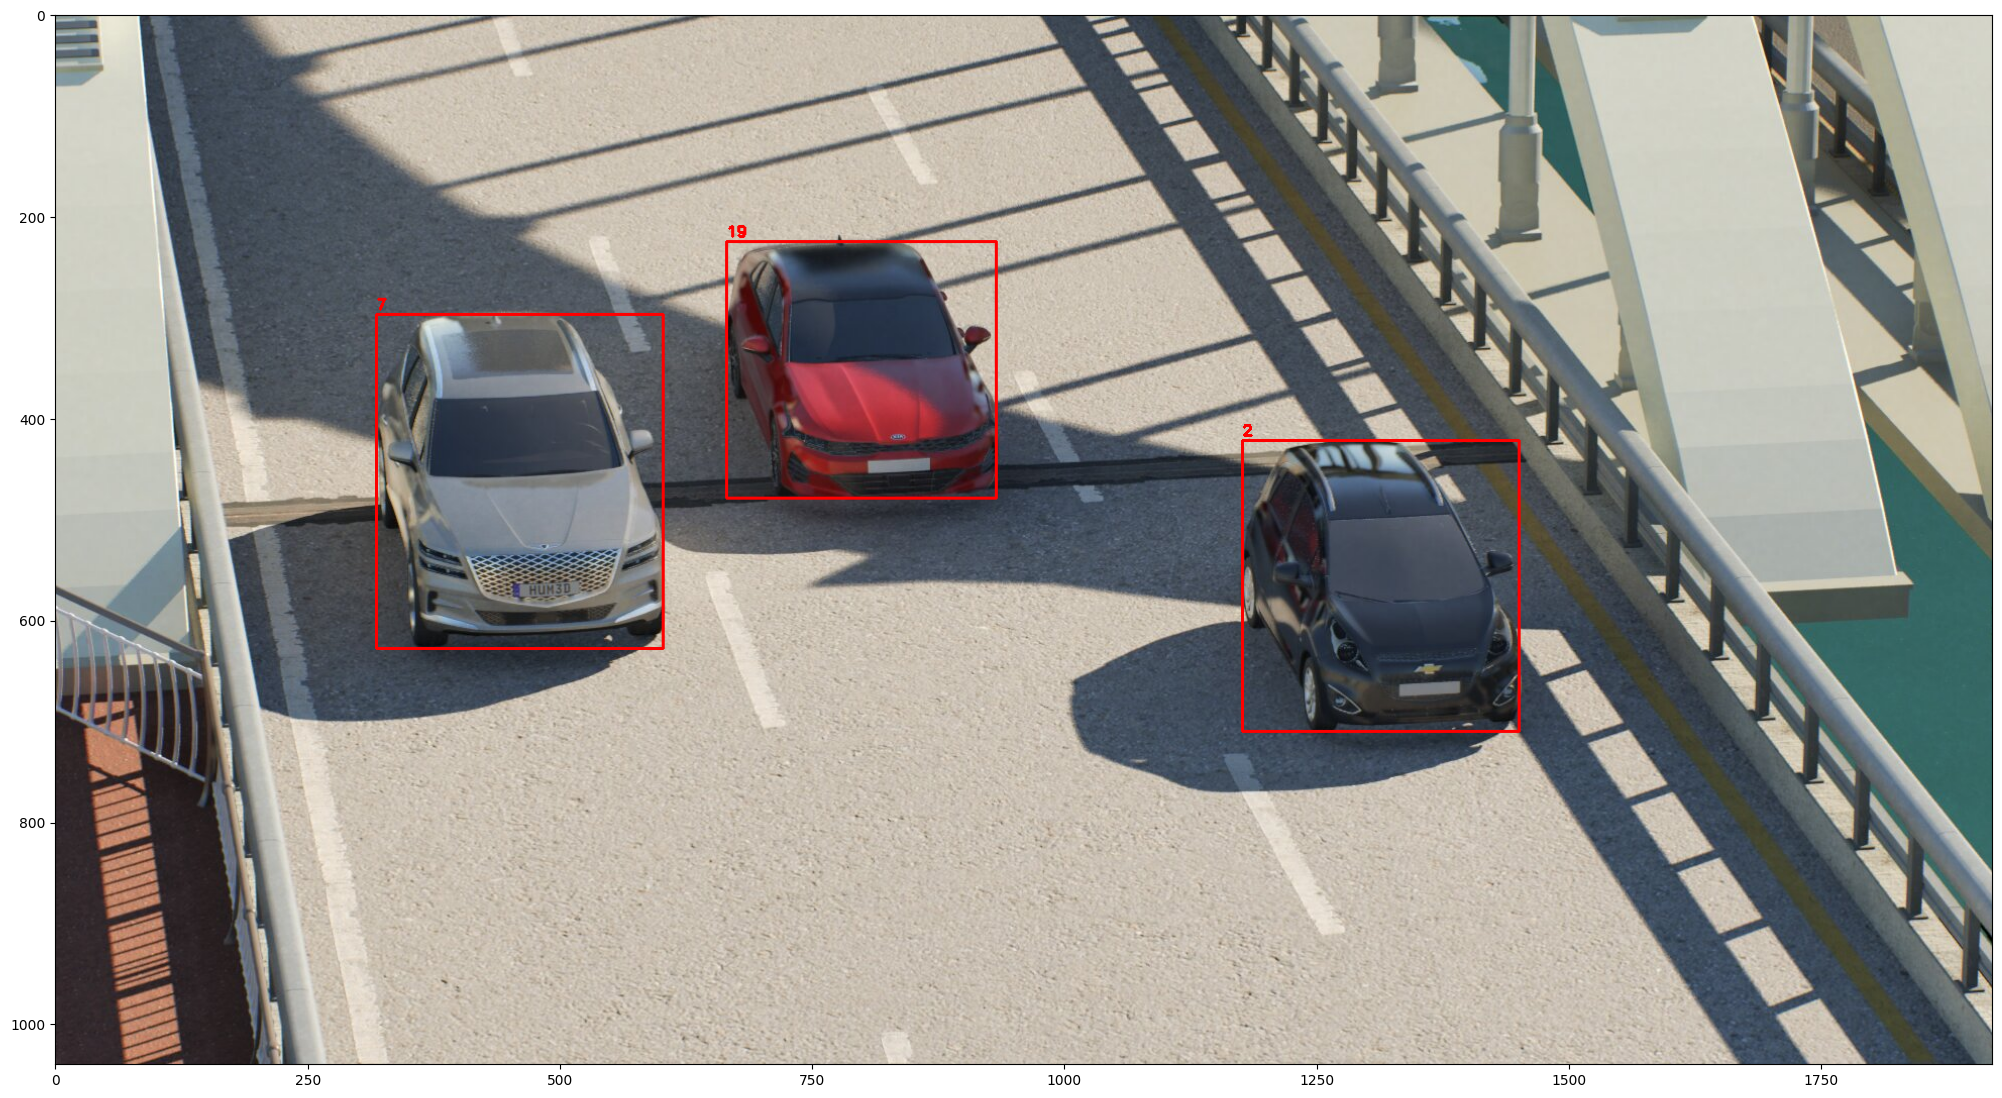

In [10]:
%cd /content
def draw_boxes_on_image(image_path, annotation_path):
    # 이미지 불러오기
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # txt 파일에서 Class ID와 Bounding Box 정보 읽기
    with open(annotation_path, 'r') as file:
        lines = file.readlines()

    for line in lines:
        values = list(map(float, line.strip().split(' ')))
        class_id = int(values[0])
        x_min, y_min = int(round(values[1])), int(round(values[2]))
        x_max, y_max = int(round(max(values[3], values[5], values[7]))), int(round(max(values[4], values[6], values[8])))

        # 이미지에 바운딩 박스 그리기
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
        cv2.putText(image, str(class_id), (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # 이미지와 바운딩 박스 출력
    plt.figure(figsize=(25, 25))
    plt.imshow(image)
    plt.show()

# 파일 경로 설정
image_file = './train/syn_00577.png'
annotation_file = './train/syn_00577.txt'

# 함수 실행
draw_boxes_on_image(image_file, annotation_file)

# 데이터 로더

In [11]:
%cd /content
!mkdir valid
%cd /content/train
# before dividing samples
total_image = sorted(glob.glob('./*.png'))
total_annotation = sorted(glob.glob('./*.txt'))
### check sampling validality
sampling_choice = random.sample(range(len(total_image)), 1000)
sampling_choice
len(np.unique(sampling_choice))

### check pairing validality
for i in range(len(total_image)):
  if total_image[i][2:11] != total_annotation[i][2:11]:
      print("Not paired!")

### check file name validality
for i in range(len(total_image)):
  if len(total_image[i]) != 15:
    print("different file name length!")

import random
import shutil


valid_size = 1000

sampling_choice = random.sample(range(len(total_image)), valid_size)
src = '/content/train/'
dst = '/content/valid/'
for choice in sampling_choice:
    chosen_image = total_image[choice]
    chosen_annotation = total_annotation[choice]
    shutil.move(src + chosen_image[2:], dst + chosen_image[2:])
    shutil.move(src + chosen_annotation[2:], dst + chosen_annotation[2:])

%cd /content

/content
/content/train
/content


In [90]:
import os
import shutil
%cd /content/train
!mkdir data
!mkdir label
# 원본 폴더와 대상 폴더 경로 설정
source_folder = '/content/train'  # 원본 폴더의 경로로 설정하세요.
png_folder = './data'      # PNG 파일을 저장할 폴더 경로
txt_folder = './label'      # TXT 파일을 저장할 폴더 경로

# 대상 폴더가 없으면 생성
os.makedirs(png_folder, exist_ok=True)
os.makedirs(txt_folder, exist_ok=True)

# 원본 폴더 내의 모든 파일을 가져와서 분류
for filename in os.listdir(source_folder):
    if filename.endswith('.png'):
        # PNG 파일인 경우
        source_path = os.path.join(source_folder, filename)
        target_path = os.path.join(png_folder, filename)
        shutil.move(source_path, target_path)
        print(f'Moved {filename} to {png_folder}')
    elif filename.endswith('.txt'):
        # TXT 파일인 경우
        source_path = os.path.join(source_folder, filename)
        target_path = os.path.join(txt_folder, filename)
        shutil.move(source_path, target_path)
        print(f'Moved {filename} to {txt_folder}')

print("모든 파일 분리가 완료되었습니다.")

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Moved syn_05638.txt to ./label
Moved syn_02956.png to ./data
Moved syn_04475.png to ./data
Moved syn_03650.txt to ./label
Moved syn_00272.png to ./data
Moved syn_04857.txt to ./label
Moved syn_04431.png to ./data
Moved syn_02848.png to ./data
Moved syn_00256.png to ./data
Moved syn_02204.png to ./data
Moved syn_05902.png to ./data
Moved syn_00564.png to ./data
Moved syn_00696.png to ./data
Moved syn_02790.png to ./data
Moved syn_00008.png to ./data
Moved syn_01574.png to ./data
Moved syn_04830.txt to ./label
Moved syn_04851.txt to ./label
Moved syn_00736.txt to ./label
Moved syn_00315.png to ./data
Moved syn_06374.png to ./data
Moved syn_00433.txt to ./label
Moved syn_04720.png to ./data
Moved syn_00980.png to ./data
Moved syn_01470.txt to ./label
Moved syn_05941.png to ./data
Moved syn_05150.png to ./data
Moved syn_01893.png to ./data
Moved syn_03036.png to ./data
Moved syn_00494.png to ./data
Moved syn_01955.txt to ./label
Moved syn_05046.png to ./

In [96]:
import os
import shutil
%cd /content/valid
!mkdir data
!mkdir label
# 원본 폴더와 대상 폴더 경로 설정
source_folder = '/content/valid'  # 원본 폴더의 경로로 설정하세요.
png_folder = './data'      # PNG 파일을 저장할 폴더 경로
txt_folder = './label'      # TXT 파일을 저장할 폴더 경로

# 대상 폴더가 없으면 생성
os.makedirs(png_folder, exist_ok=True)
os.makedirs(txt_folder, exist_ok=True)

# 원본 폴더 내의 모든 파일을 가져와서 분류
for filename in os.listdir(source_folder):
    if filename.endswith('.png'):
        # PNG 파일인 경우
        source_path = os.path.join(source_folder, filename)
        target_path = os.path.join(png_folder, filename)
        shutil.move(source_path, target_path)
        print(f'Moved {filename} to {png_folder}')
    elif filename.endswith('.txt'):
        # TXT 파일인 경우
        source_path = os.path.join(source_folder, filename)
        target_path = os.path.join(txt_folder, filename)
        shutil.move(source_path, target_path)
        print(f'Moved {filename} to {txt_folder}')

print("모든 파일 분리가 완료되었습니다.")

/content/valid
Moved syn_04279.png to ./data
Moved syn_04833.png to ./data
Moved syn_02340.png to ./data
Moved syn_02991.png to ./data
Moved syn_03047.txt to ./label
Moved syn_00687.png to ./data
Moved syn_01074.txt to ./label
Moved syn_01173.png to ./data
Moved syn_00834.txt to ./label
Moved syn_04746.png to ./data
Moved syn_04645.png to ./data
Moved syn_00825.txt to ./label
Moved syn_02963.png to ./data
Moved syn_01816.txt to ./label
Moved syn_00888.txt to ./label
Moved syn_04217.txt to ./label
Moved syn_02145.txt to ./label
Moved syn_04630.png to ./data
Moved syn_00850.png to ./data
Moved syn_03991.txt to ./label
Moved syn_01400.txt to ./label
Moved syn_02692.png to ./data
Moved syn_02712.png to ./data
Moved syn_01728.png to ./data
Moved syn_00248.png to ./data
Moved syn_05561.txt to ./label
Moved syn_04833.txt to ./label
Moved syn_02396.txt to ./label
Moved syn_03957.txt to ./label
Moved syn_00416.png to ./data
Moved syn_02221.png to ./data
Moved syn_05772.png to ./data
Moved syn_0

In [124]:
%cd /content/coco
!mkdir annotations
%cd /content

IMG_ROOT_DIR = '/content/'
LABEL_ROOT_DIR = '/content/'
OUTPUT_DIR = '/content/coco/annotations'

def yolo_to_coco(IMG_ROOT_DIR, LABEL_ROOT_DIR, output_dir):
	# Define categories
  categories = [{'id': 0, 'name': 'chevrolet_malibu_sedan_2012_2016','supercategory': '0'},
                {'id': 1, 'name': 'chevrolet_malibu_sedan_2017_2019','supercategory': '1'},
                {'id': 2, 'name': 'chevrolet_spark_hatchback_2016_2021','supercategory': '2'},
                {'id': 3, 'name': 'chevrolet_trailblazer_suv_2021_','supercategory': '3'},
                {'id': 4, 'name': 'chevrolet_trax_suv_2017_2019','supercategory': '4'},
                {'id': 5, 'name': 'genesis_g80_sedan_2016_2020','supercategory': '5'},
                {'id': 6, 'name': 'genesis_g80_sedan_2021_','supercategory': '6'},
                {'id': 7, 'name': 'genesis_gv80_suv_2020_','supercategory': '7'},
                {'id': 8, 'name': 'hyundai_avante_sedan_2011_2015','supercategory': '8'},
                {'id': 9, 'name': 'hyundai_avante_sedan_2020_','supercategory': '9'},
                {'id': 10, 'name': 'hyundai_grandeur_sedan_2011_2016','supercategory': '10'},
                {'id': 11, 'name': 'hyundai_grandstarex_van_2018_2020','supercategory': '11'},
                {'id': 12, 'name': 'hyundai_ioniq_hatchback_2016_2019','supercategory': '12'},
                {'id': 13, 'name': 'hyundai_sonata_sedan_2004_2009','supercategory': '13'},
                {'id': 14, 'name': 'hyundai_sonata_sedan_2010_2014','supercategory': '14'},
                {'id': 15, 'name': 'hyundai_sonata_sedan_2019_2020','supercategory': '15'},
                {'id': 16, 'name': 'kia_carnival_van_2015_2020','supercategory': '16'},
                {'id': 17, 'name': 'kia_carnival_van_2021_','supercategory': '17'},
                {'id': 18, 'name': 'kia_k5_sedan_2010_2015','supercategory': '18'},
                {'id': 19, 'name': 'kia_k5_sedan_2020_','supercategory': '19'},
                {'id': 20, 'name': 'kia_k7_sedan_2016_2020','supercategory': '20'},
                {'id': 21, 'name': 'kia_mohave_suv_2020_','supercategory': '21'},
                {'id': 22, 'name': 'kia_morning_hatchback_2004_2010','supercategory': '22'},
                {'id': 23, 'name': 'kia_morning_hatchback_2011_2016','supercategory': '23'},
                {'id': 24, 'name': 'kia_ray_hatchback_2012_2017','supercategory': '24'},
                {'id': 25, 'name': 'kia_sorrento_suv_2015_2019','supercategory': '25'},
                {'id': 26, 'name': 'kia_sorrento_suv_2020_','supercategory': '26'},
                {'id': 27, 'name': 'kia_soul_suv_2014_2018','supercategory': '27'},
                {'id': 28, 'name': 'kia_sportage_suv_2016_2020','supercategory': '28'},
                {'id': 29, 'name': 'kia_stonic_suv_2017_2019','supercategory': '29'},
                {'id': 30, 'name': 'renault_sm3_sedan_2015_2018','supercategory': '30'},
                {'id': 31, 'name': 'renault_xm3_suv_2020_','supercategory': '31'},
                {'id': 32, 'name': 'ssangyong_korando_suv_2019_2020','supercategory': '32'},
                {'id': 33, 'name': 'ssangyong_tivoli_suv_2016_2020','supercategory': '33'}]
  data = {'train':[], 'validation':[]}
  for split in ['train', 'valid']:
    split_data = {'images': [], 'annotations': [], 'categories': categories}
    image_files = sorted(glob.glob(IMG_ROOT_DIR+split+'/data'+'/*.png'))
    label_files = sorted(glob.glob(LABEL_ROOT_DIR+split+'/label'+'/*.txt'))
    cumulative_id = 0

    with tqdm(total=len(image_files), desc=f'Processing {split} images') as pbar:
      for i, filename in enumerate(image_files):
        image_path = os.path.join(IMG_ROOT_DIR+split, '/data', filename)
        im = Image.open(image_path)
        im_id = i + 1

        split_data['images'].append({
          'file_name': filename,
          'id': im_id,
          'width': im.size[0],
          'height': im.size[1]
        })
				# Get labels for current image

      for i, filename in enumerate(label_files):
        label_path = os.path.join(LABEL_ROOT_DIR+split, os.path.splitext(filename)[0] + '.txt')
        with open(label_path, 'r') as file:
          lines = file.readlines()

        for line in lines:
          values = list(map(float, line.strip().split(' ')))
          class_id = int(values[0])
          bbox_x = int(round(values[1]))
          bbox_y = int(round(values[2]))

          x_max, y_max = int(round(max(values[3], values[5], values[7]))), int(round(max(values[4], values[6], values[8])))

          bbox_width = x_max-bbox_x
          bbox_height = y_max-bbox_y

          split_data['annotations'].append({
            'id': cumulative_id,
            'image_id': im_id,
            'category_id': class_id,
            'bbox': [bbox_x, bbox_y, bbox_width, bbox_height],
            'area': bbox_width * bbox_height
          })

          cumulative_id += 1

        pbar.update(1)

    if split == 'train':
      data["train"] = split_data
    else:
      data["validation"] = split_data

	# Save data to JSON files
  for split in ['train', 'validation']:
    filename = os.path.join(output_dir, 'instances_'+f'{split}'+'2017.json')
    with open(filename, 'w') as f:
      json.dump(data[split], f)

  return data
coco_data = yolo_to_coco(IMG_ROOT_DIR, LABEL_ROOT_DIR, OUTPUT_DIR)

/content/coco
mkdir: cannot create directory ‘annotations’: File exists
/content


Processing valid images: 100%|██████████| 1000/1000 [00:00<00:00, 11168.19it/s]


# 모델

In [147]:
%cd /content
#shutil.move('train', 'coco')
#shutil.move('valid', 'coco')
#shutil.move('test', 'coco')
import mmcv
import os.path as osp

cfg.dataset_type = 'CarDataset'
cfg.data_root = '/content/coco/'

cfg.train_dataloader.type = 'CarDataset'
cfg.train_dataloader.dataset.data_prefix = dict(img='train/data/')
cfg.train_dataloader.dataset.ann_file = 'annotations/instances_train2017.json'
cfg.train_dataloader.dataset.data_root = '/content/coco/'

cfg.val_dataloader.type = 'CarDataset'
cfg.val_dataloader.dataset.ann_file = 'annotations/instances_validation2017.json'
cfg.val_dataloader.dataset.data_root = '/content/coco/'
cfg.val_dataloader.dataset.data_prefix = dict(img='valid/data/')

cfg.test_dataloader.type = 'CarDataset'
cfg.test_dataloader.dataset.ann_file = 'annotations/instances_validation2017.json'
cfg.test_dataloader.dataset.data_root = '/content/coco/'
cfg.test_dataloader.dataset.data_prefix = dict(img='valid/data/')

cfg.val_evaluator.ann_file = '/content/coco/annotations/instances_validation2017.json'
cfg.test_evaluator.ann_file='/content/coco/annotations/instances_validation2017.json'
cfg.model.bbox_head.num_classes = 34
cfg.load_from = '/content/mmdetection/checkpoints/detr_r50_8xb2-150e_coco_20221023_153551-436d03e8.pth'
cfg.work_dir =  '/content/train_weights'
cfg.optim_wrapper.optimizer.lr = 0.02
cfg.default_hooks.logger.interval = 5
cfg.max_epochs = 20

cfg.dump('detr1_config.py')


/content


In [145]:
print(cfg.pretty_text)

auto_scale_lr = dict(base_batch_size=16)
backend_args = None
data_root = '/content/'
dataset_type = 'CarDataset'
default_hooks = dict(
    checkpoint=dict(interval=1, type='CheckpointHook'),
    logger=dict(interval=5, type='LoggerHook'),
    param_scheduler=dict(type='ParamSchedulerHook'),
    sampler_seed=dict(type='DistSamplerSeedHook'),
    timer=dict(type='IterTimerHook'),
    visualization=dict(type='DetVisualizationHook'))
default_scope = 'mmdet'
env_cfg = dict(
    cudnn_benchmark=False,
    dist_cfg=dict(backend='nccl'),
    mp_cfg=dict(mp_start_method='fork', opencv_num_threads=0))
load_from = '/content/mmdetection/checkpoints/detr_r50_8xb2-150e_coco_20221023_153551-436d03e8.pth'
log_level = 'INFO'
log_processor = dict(by_epoch=True, type='LogProcessor', window_size=50)
max_epochs = 20
model = dict(
    backbone=dict(
        depth=50,
        frozen_stages=1,
        init_cfg=dict(checkpoint='torchvision://resnet50', type='Pretrained'),
        norm_cfg=dict(requires_grad=Fa

In [148]:
%cd /content
CONFIG_FILE = './detr1_config.py'
!python mmdetection/tools/train.py ./detr1_config.py

/content
11/08 05:34:33 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
    CUDA available: True
    numpy_random_seed: 2063071283
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.1.0+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.1.1 (Git Hash 64f6bcbcbab628e96f33a62c3e975f8535a7bde4)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX512
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_50,code=sm_50;-gencode;arc

In [ ]:
inference(infer_model, test_loader)